In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import dataset

In [12]:
file_path = "AMD Database.xlsx"
marketing_campaigns = pd.read_excel(file_path, sheet_name='marketing_campaigns')
sales = pd.read_excel(file_path, sheet_name='sales')
stock_performance = pd.read_excel(file_path, sheet_name='stock_performance')

# Bar Graph Of Total Revenue Distribution by Region

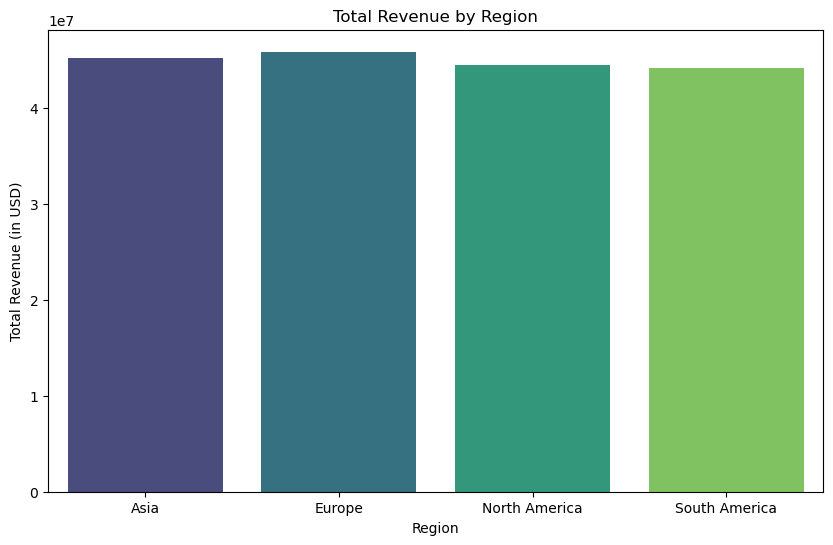

In [53]:
revenue_by_region = sales.groupby('Region')['Revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Revenue', data=revenue_by_region, hue='Region', palette='viridis', legend=False)
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (in USD)')
plt.show()

# Scatter Plot Of Budget vs. Sales Impact

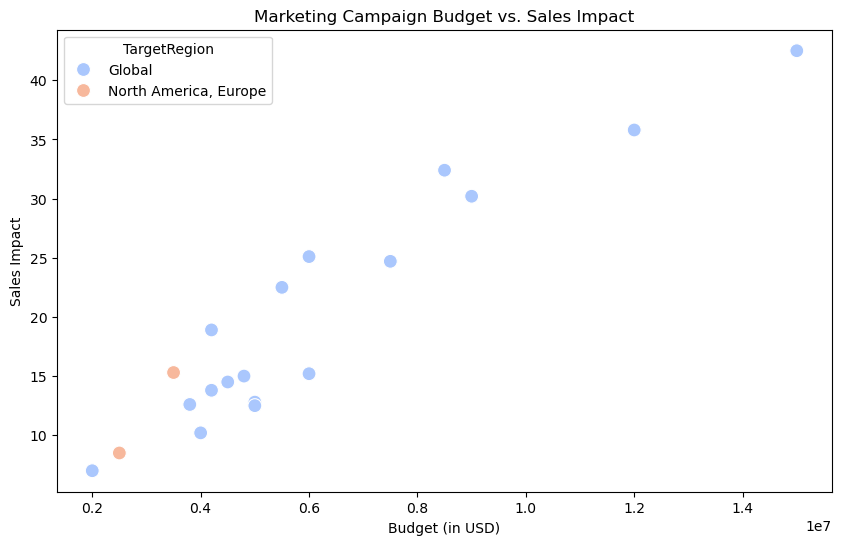

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Budget', y='SalesImpact', data=marketing_campaigns, hue='TargetRegion', palette='coolwarm', s=100)
plt.title('Marketing Campaign Budget vs. Sales Impact')
plt.xlabel('Budget (in USD)')
plt.ylabel('Sales Impact')
plt.show()

# Histogram of Distribution of Marketing Campaign Budgets

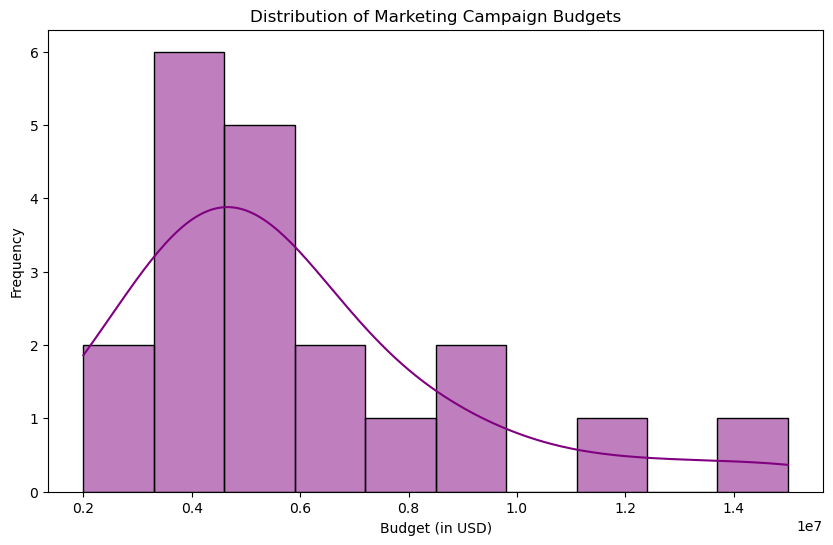

In [26]:
#Campaign Budget Distribution
plt.figure(figsize=(10, 6))
sns.histplot(marketing_campaigns['Budget'], bins=10, kde=True, color='purple')
plt.title('Distribution of Marketing Campaign Budgets')
plt.xlabel('Budget (in USD)')
plt.ylabel('Frequency')
plt.show()


# What is the total revenue generated over time?

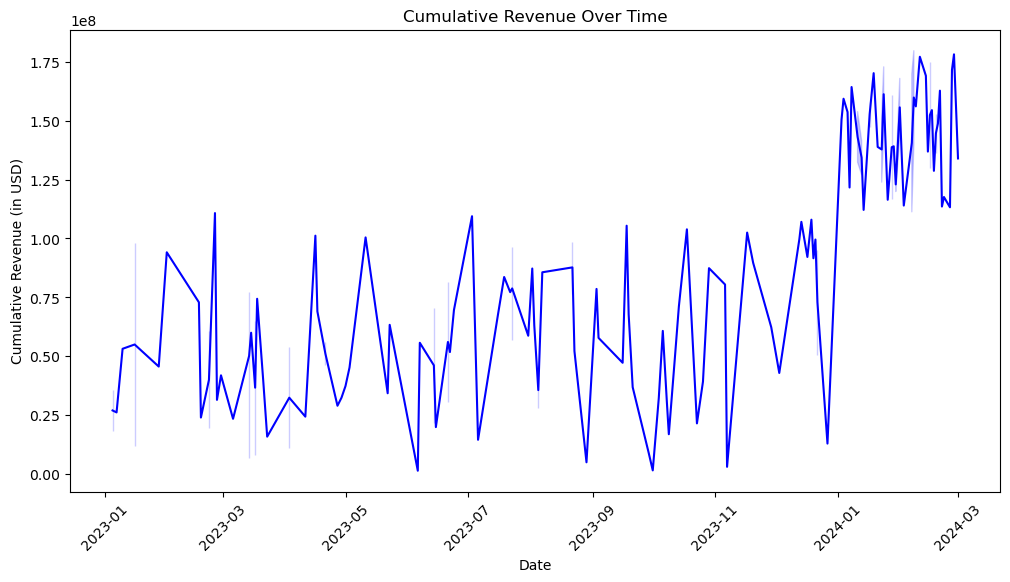

In [64]:

sales['SaleDate'] = pd.to_datetime(sales['SaleDate'])
sales['CumulativeRevenue'] = sales['Revenue'].cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(x='SaleDate', y='CumulativeRevenue', data=sales, color='blue')
plt.title('Cumulative Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue (in USD)')
plt.xticks(rotation=45)
plt.show()

#  What is the monthly revenue trend?

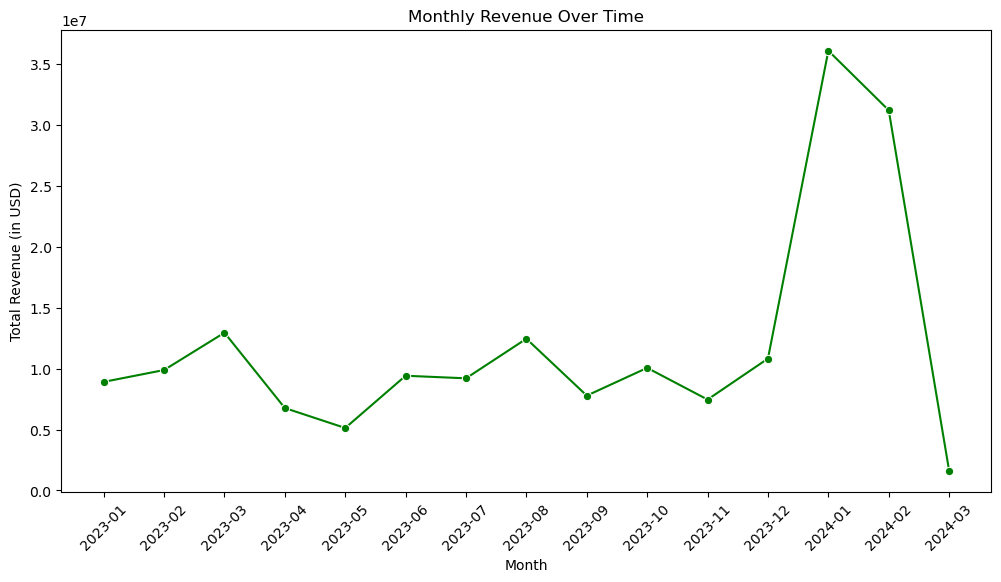

In [38]:
sales['Month'] = sales['SaleDate'].dt.to_period('M')
monthly_revenue = sales.groupby('Month')['Revenue'].sum().reset_index()
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Revenue', data=monthly_revenue, marker='o', color='green')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue (in USD)')
plt.xticks(rotation=45)
plt.show()

# What is the stock's closing price trend?

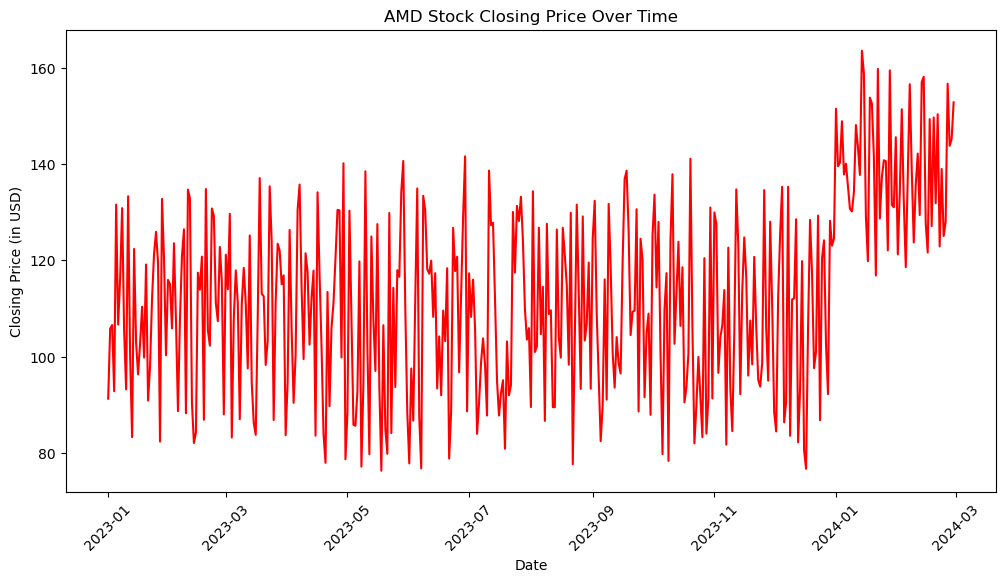

In [40]:
stock_performance['StockDate'] = pd.to_datetime(stock_performance['StockDate'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='StockDate', y='ClosePrice', data=stock_performance, color='red')
plt.title('AMD Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (in USD)')
plt.xticks(rotation=45)
plt.show()

# What is the relationship between stock price and trading volume?

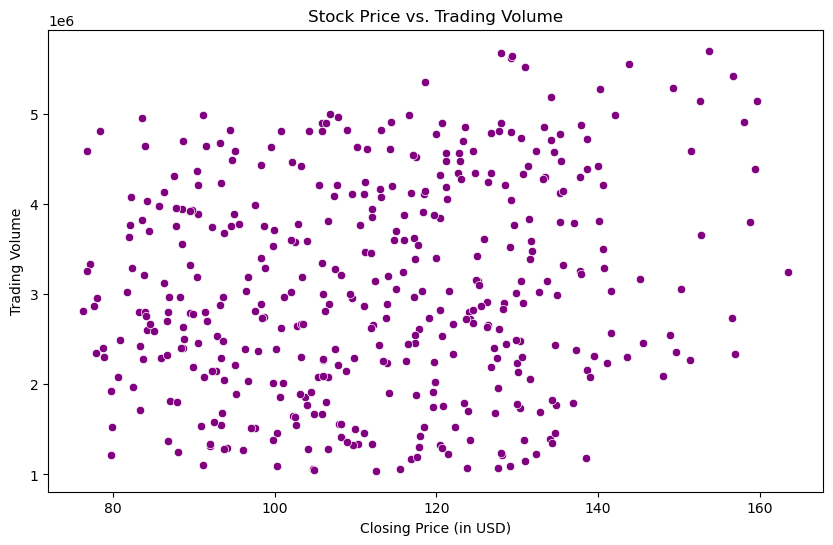

Correlation between stock price and trading volume: 0.16


In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ClosePrice', y='TradingVolume', data=stock_performance, color='purple')
plt.title('Stock Price vs. Trading Volume')
plt.xlabel('Closing Price (in USD)')
plt.ylabel('Trading Volume')
plt.show()

# Correlation
correlation = stock_performance['ClosePrice'].corr(stock_performance['TradingVolume'])
print(f"Correlation between stock price and trading volume: {correlation:.2f}")

# What is the ROI ((Return on Investment)) of marketing campaigns?


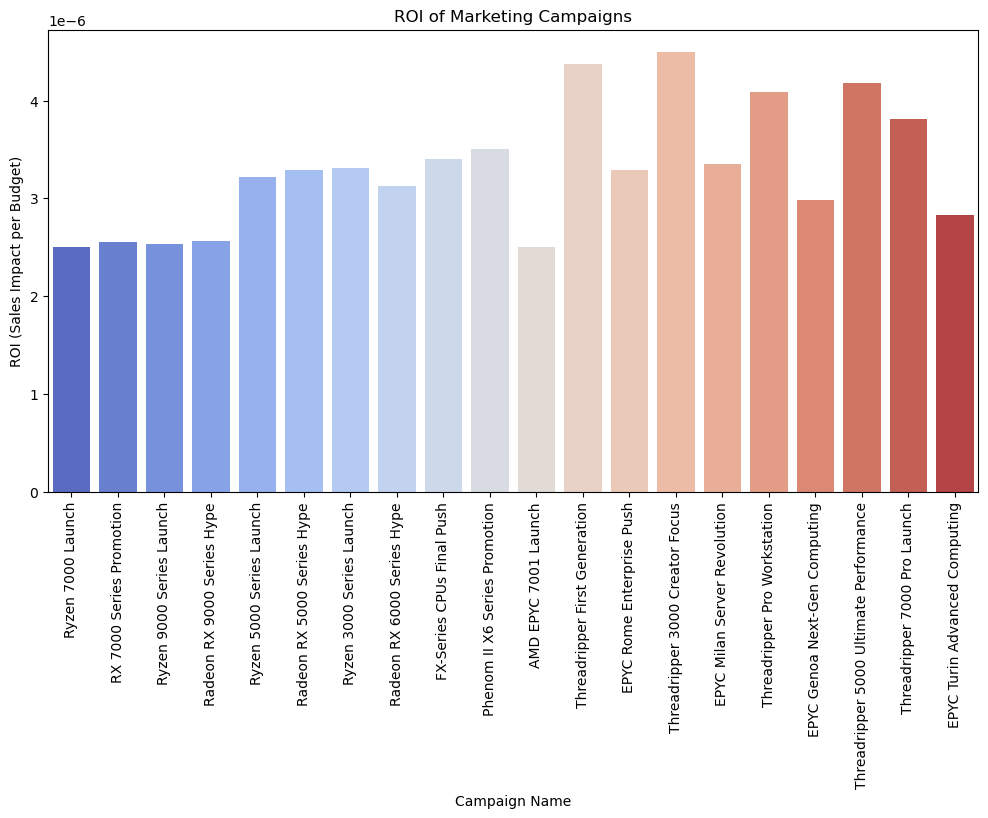

In [55]:
marketing_campaigns['ROI'] = marketing_campaigns['SalesImpact'] / marketing_campaigns['Budget']

plt.figure(figsize=(12, 6))
sns.barplot(x='CampaignName', y='ROI', data=marketing_campaigns, hue='CampaignName', palette='coolwarm', legend=False)
plt.title('ROI of Marketing Campaigns')
plt.xlabel('Campaign Name')
plt.ylabel('ROI (Sales Impact per Budget)')
plt.xticks(rotation=90)
plt.show()

# What is the average revenue per product?

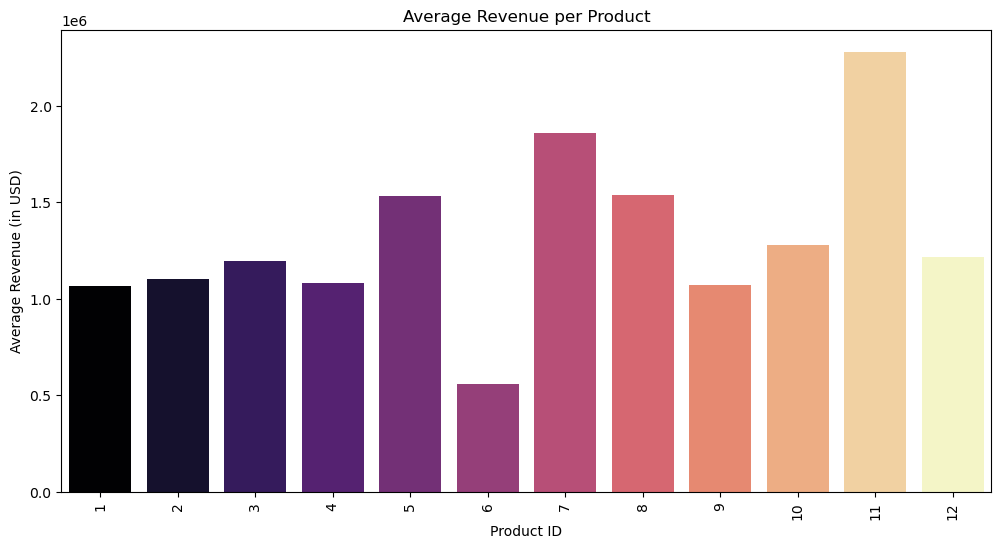

In [84]:
average_revenue_per_product = sales.groupby('ProductID')['Revenue'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='ProductID', y='Revenue', data=average_revenue_per_product, hue='ProductID', palette='magma', legend=False)
plt.title('Average Revenue per Product')
plt.xlabel('Product ID')
plt.ylabel('Average Revenue (in USD)')
plt.xticks(rotation=90)
plt.show()